<a href="https://colab.research.google.com/github/hassanme/FUTURE_ML_01/blob/main/KNN_letter_Recognition_With_Three_Distances.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install ucimlrepo

# **We Fetch the Data set**

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
letter_recognition = fetch_ucirepo(id=59)

# data (as pandas dataframes)
X = letter_recognition.data.features
y = letter_recognition.data.targets

# metadata
print(letter_recognition.metadata)

# variable information
print(letter_recognition.variables)


{'uci_id': 59, 'name': 'Letter Recognition', 'repository_url': 'https://archive.ics.uci.edu/dataset/59/letter+recognition', 'data_url': 'https://archive.ics.uci.edu/static/public/59/data.csv', 'abstract': 'Database of character image features; try to identify the letter', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 20000, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['lettr'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1991, 'last_updated': 'Thu Sep 28 2023', 'dataset_doi': '10.24432/C5ZP40', 'creators': ['David Slate'], 'intro_paper': None, 'additional_info': {'summary': 'The objective is to identify each of a large number of black-and-white rectangular pixel displays as one of the 26 capital letters in the English alphabet.  The character images were based on 20 different fonts and each letter within these 20 fonts wa

**Here is the basic Information on letter Recognition Dataset**

In [ ]:
X

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x-box   20000 non-null  int64
 1   y-box   20000 non-null  int64
 2   width   20000 non-null  int64
 3   high    20000 non-null  int64
 4   onpix   20000 non-null  int64
 5   x-bar   20000 non-null  int64
 6   y-bar   20000 non-null  int64
 7   x2bar   20000 non-null  int64
 8   y2bar   20000 non-null  int64
 9   xybar   20000 non-null  int64
 10  x2ybr   20000 non-null  int64
 11  xy2br   20000 non-null  int64
 12  x-ege   20000 non-null  int64
 13  xegvy   20000 non-null  int64
 14  y-ege   20000 non-null  int64
 15  yegvx   20000 non-null  int64
dtypes: int64(16)
memory usage: 2.4 MB


In [ ]:
X.info

<bound method DataFrame.info of        x-box  y-box  width  high  onpix  x-bar  y-bar  x2bar  y2bar  xybar  \
0          2      8      3     5      1      8     13      0      6      6   
1          5     12      3     7      2     10      5      5      4     13   
2          4     11      6     8      6     10      6      2      6     10   
3          7     11      6     6      3      5      9      4      6      4   
4          2      1      3     1      1      8      6      6      6      6   
...      ...    ...    ...   ...    ...    ...    ...    ...    ...    ...   
19995      2      2      3     3      2      7      7      7      6      6   
19996      7     10      8     8      4      4      8      6      9     12   
19997      6      9      6     7      5      6     11      3      7     11   
19998      2      3      4     2      1      8      7      2      6     10   
19999      4      9      6     6      2      9      5      3      1      8   

       x2ybr  xy2br  x-ege  xegvy  y-ege  yegvx  
0         10      8      0      8      0      8  
1          3      9      2      8      4     10  
2          3      7      3      7      3      9  
3          4     10      6     10      2      8  
4          5      9      1      7      5     10  
...      ...    ...    ...    ...    ...    ...  
19995      6      4      2      8      3      7  
19996      9     13      2      9      3      7  
19997      9      5      2     12      2      4  
19998      6      8      1      9      5      8  
19999      1      8      2      7      2      8  

[20000 rows x 16 columns]>

In [ ]:
letter_recognition.variables

,name,role,type,demographic,description,units,missing_values
0,lettr,Target,Categorical,None,capital letter,None,no
1,x-box,Feature,Integer,None,horizontal position of box,None,no
2,y-box,Feature,Integer,None,vertical position of box,None,no
3,width,Feature,Integer,None,width of box,None,no
4,high,Feature,Integer,None,height of box,None,no
5,onpix,Feature,Integer,None,total # on pixels,None,no
6,x-bar,Feature,Integer,None,mean x of on pixels in box,None,no
7,y-bar,Feature,Integer,None,mean y of on pixels in box,None,no
8,x2bar,Feature,Integer,None,mean x variance,None,no
9,y2bar,Feature,Integer,None,mean y variance,None,no


In [ ]:
letter_recognition.data.features

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [ ]:
letter_recognition.data.targets

,lettr
0,T
1,I
2,D
3,N
4,G
...,...
19995,D
19996,C
19997,T
19998,S


In [ ]:
letter_recognition.data.all

In [ ]:
letter_recognition.data.features.head()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [ ]:
letter_recognition.data.targets.head()

,lettr
0,T
1,I
2,D
3,N
4,G


In [ ]:
letter_recognition.data.features.describe()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [ ]:
letter_recognition.data.targets.describe()

,lettr
count,20000
unique,26
top,U
freq,813


In [ ]:
letter_recognition.data.features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x-box   20000 non-null  int64
 1   y-box   20000 non-null  int64
 2   width   20000 non-null  int64
 3   high    20000 non-null  int64
 4   onpix   20000 non-null  int64
 5   x-bar   20000 non-null  int64
 6   y-bar   20000 non-null  int64
 7   x2bar   20000 non-null  int64
 8   y2bar   20000 non-null  int64
 9   xybar   20000 non-null  int64
 10  x2ybr   20000 non-null  int64
 11  xy2br   20000 non-null  int64
 12  x-ege   20000 non-null  int64
 13  xegvy   20000 non-null  int64
 14  y-ege   20000 non-null  int64
 15  yegvx   20000 non-null  int64
dtypes: int64(16)
memory usage: 2.4 MB


In [ ]:
letter_recognition.data.targets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   lettr   20000 non-null  object
dtypes: object(1)
memory usage: 156.4+ KB


In [ ]:
letter_recognition.data.features.isnull().sum()

,0
x-box,0
y-box,0
width,0
high,0
onpix,0
x-bar,0
y-bar,0
x2bar,0
y2bar,0
xybar,0


In [ ]:
letter_recognition.data.targets.isnull().sum()

,0
lettr,0


In [ ]:
letter_recognition.data.features.shape

(20000, 16)

In [ ]:
# Encode target labels (if necessary)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt



label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Encode labels as integers

# Split the dataset into training and testing sets (80% training, 20% testing)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Evaluating KNN with Cross-Validation for Different Distance Metrics:


Evaluating KNN with Euclidean distance metric:

K=1: Accuracy=0.96, Precision=0.96, Recall=0.96, F1 Score=0.96
K=2: Accuracy=0.95, Precision=0.95, Recall=0.95, F1 Score=0.95
K=3: Accuracy=0.96, Precision=0.96, Recall=0.96, F1 Score=0.96
K=4: Accuracy=0.95, Precision=0.95, Recall=0.95, F1 Score=0.95
K=5: Accuracy=0.95, Precision=0.95, Recall=0.95, F1 Score=0.95
K=6: Accuracy=0.95, Precision=0.95, Recall=0.95, F1 Score=0.95
K=7: Accuracy=0.95, Precision=0.95, Recall=0.95, F1 Score=0.95
K=8: Accuracy=0.95, Precision=0.95, Recall=0.95, F1 Score=0.95
K=9: Accuracy=0.95, Precision=0.95, Recall=0.95, F1 Score=0.95
K=10: Accuracy=0.95, Precision=0.95, Recall=0.95, F1 Score=0.95

Evaluating KNN with Manhattan distance metric:

K=1: Accuracy=0.95, Precision=0.95, Recall=0.95, F1 Score=0.95
K=2: Accuracy=0.94, Precision=0.95, Recall=0.94, F1 Score=0.94
K=3: Accuracy=0.95, Precision=0.96, Recall=0.95, F1 Score=0.95
K=4: Accura

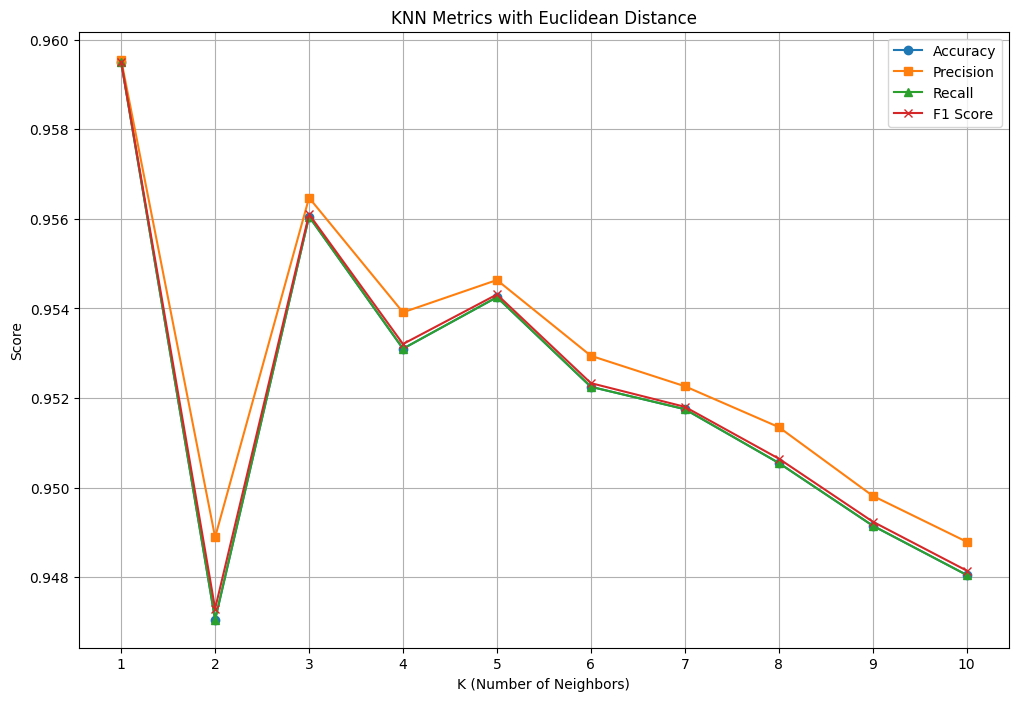

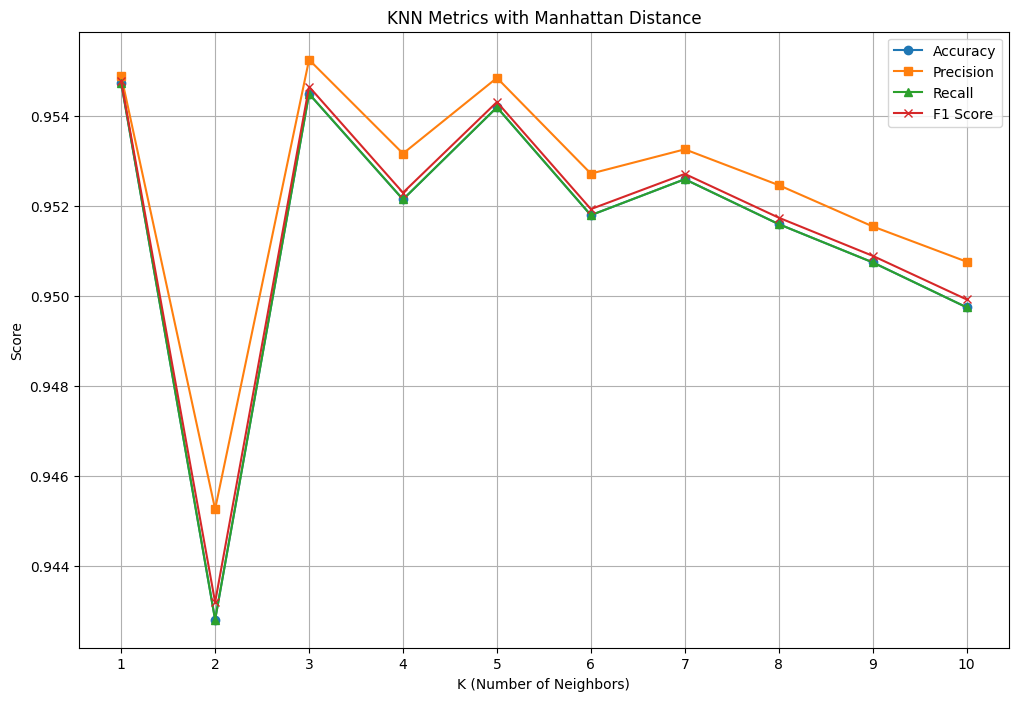

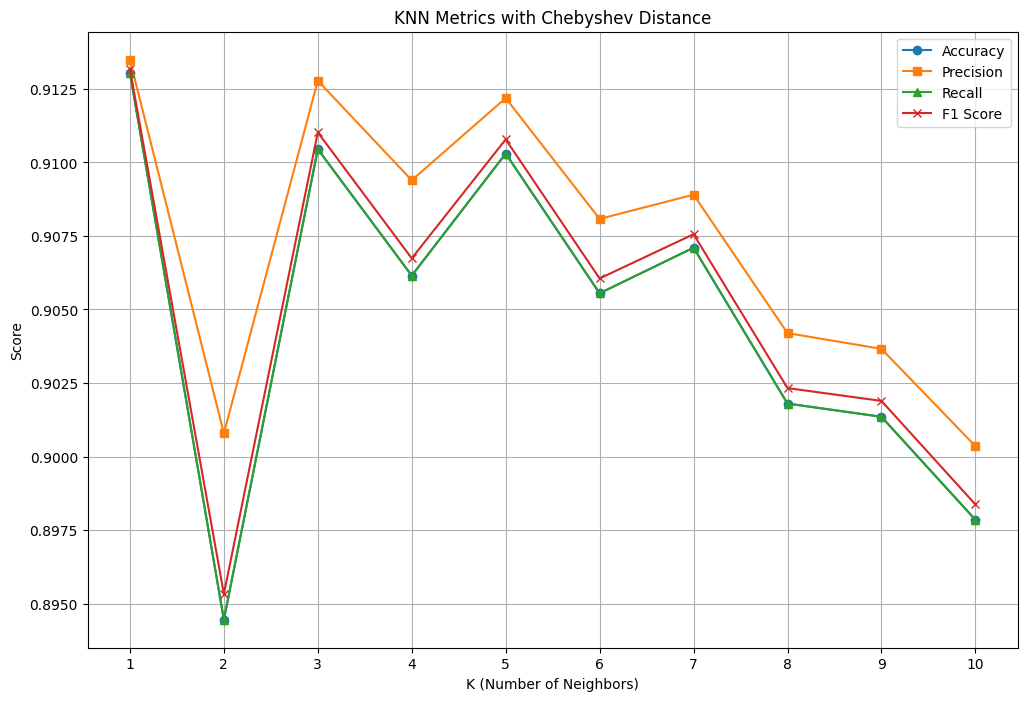

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict, StratifiedKFold
import matplotlib.pyplot as plt

# Encode target labels
# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(y)  # Encode labels as integers

# Normalize features to range [0, 1]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Define K values and distance metrics to evaluate
k_values = range(1, 11)
distance_metrics = ['euclidean', 'manhattan', 'chebyshev']
results = {metric: {'accuracy': [], 'precision': [], 'recall': [], 'f1_score': []} for metric in distance_metrics}

# Cross-validation setup
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)  # 5-fold cross-validation

print("\nEvaluating KNN with Cross-Validation for Different Distance Metrics:\n")

# Evaluate for each distance metric
for metric in distance_metrics:
    print(f"\nEvaluating KNN with {metric.capitalize()} distance metric:\n")
    for k in k_values:
        # Initialize the KNN classifier with the current metric
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)

        # Perform cross-validation and get predictions
        y_pred = cross_val_predict(knn, X, y, cv=cv)

        # Calculate evaluation metrics
        accuracy = accuracy_score(y, y_pred)
        precision = precision_score(y, y_pred, average='weighted')
        recall = recall_score(y, y_pred, average='weighted')
        f1 = f1_score(y, y_pred, average='weighted')

        # Store the results for the current metric and k
        results[metric]['accuracy'].append(accuracy)
        results[metric]['precision'].append(precision)
        results[metric]['recall'].append(recall)
        results[metric]['f1_score'].append(f1)

        # Print the results for the current k
        print(f"K={k}: Accuracy={accuracy:.2f}, Precision={precision:.2f}, Recall={recall:.2f}, F1 Score={f1:.2f}")

# Visualize the results for each metric
for metric in distance_metrics:
    plt.figure(figsize=(12, 8))
    plt.plot(k_values, results[metric]['accuracy'], marker='o', label='Accuracy')
    plt.plot(k_values, results[metric]['precision'], marker='s', label='Precision')
    plt.plot(k_values, results[metric]['recall'], marker='^', label='Recall')
    plt.plot(k_values, results[metric]['f1_score'], marker='x', label='F1 Score')
    plt.title(f"KNN Metrics with {metric.capitalize()} Distance")
    plt.xlabel("K (Number of Neighbors)")
    plt.ylabel("Score")
    plt.xticks(k_values)
    plt.legend()
    plt.grid(True)
    plt.show()



Evaluating KNN with Cross-Validation for Different Distance Metrics:


Evaluating KNN with Euclidean distance metric:

K=1: Accuracy=0.96, Precision=0.96, Recall=0.96, F1 Score=0.96
K=3: Accuracy=0.96, Precision=0.96, Recall=0.96, F1 Score=0.96
K=5: Accuracy=0.96, Precision=0.96, Recall=0.96, F1 Score=0.96
K=7: Accuracy=0.96, Precision=0.96, Recall=0.96, F1 Score=0.96
K=9: Accuracy=0.96, Precision=0.96, Recall=0.96, F1 Score=0.96

Evaluating KNN with Manhattan distance metric:

K=1: Accuracy=0.95, Precision=0.95, Recall=0.95, F1 Score=0.95
K=3: Accuracy=0.96, Precision=0.96, Recall=0.96, F1 Score=0.96
K=5: Accuracy=0.96, Precision=0.96, Recall=0.96, F1 Score=0.96
K=7: Accuracy=0.96, Precision=0.96, Recall=0.96, F1 Score=0.96
K=9: Accuracy=0.96, Precision=0.96, Recall=0.96, F1 Score=0.96

Evaluating KNN with Chebyshev distance metric:

K=1: Accuracy=0.91, Precision=0.91, Recall=0.91, F1 Score=0.91
K=3: Accuracy=0.92, Precision=0.92, Recall=0.92, F1 Score=0.92
K=5: Accuracy=0.92, Precis

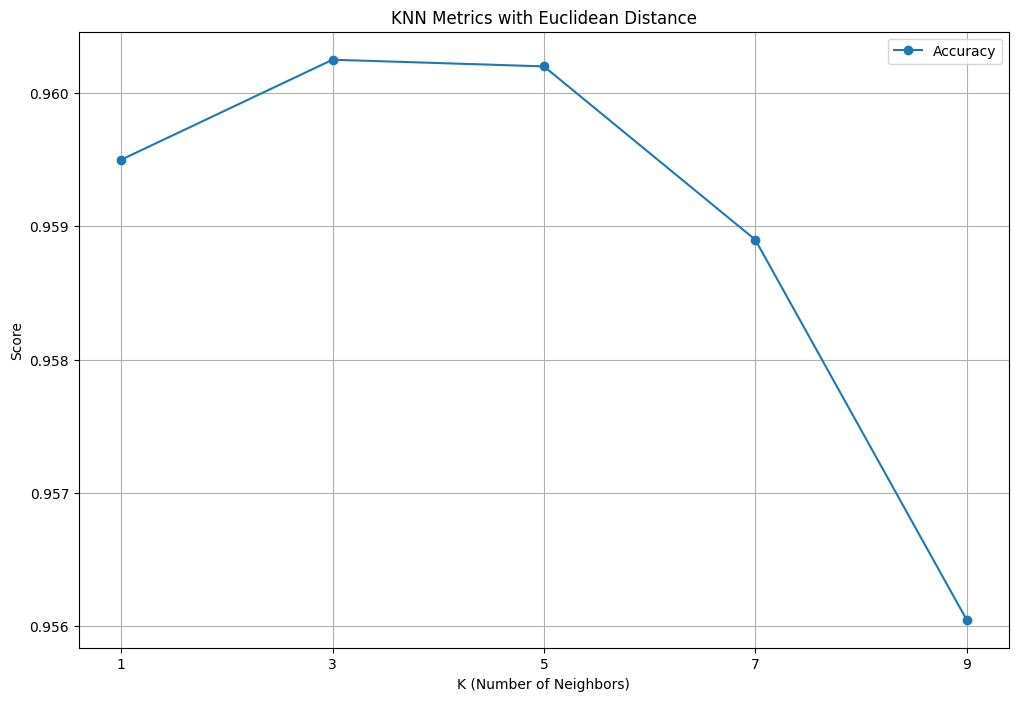

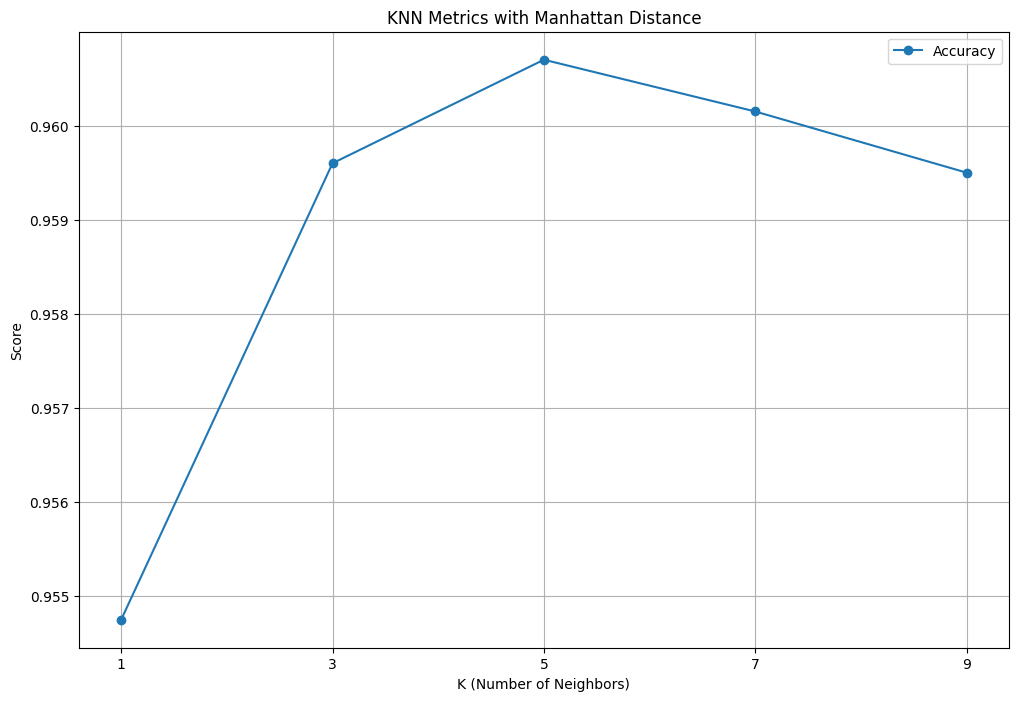

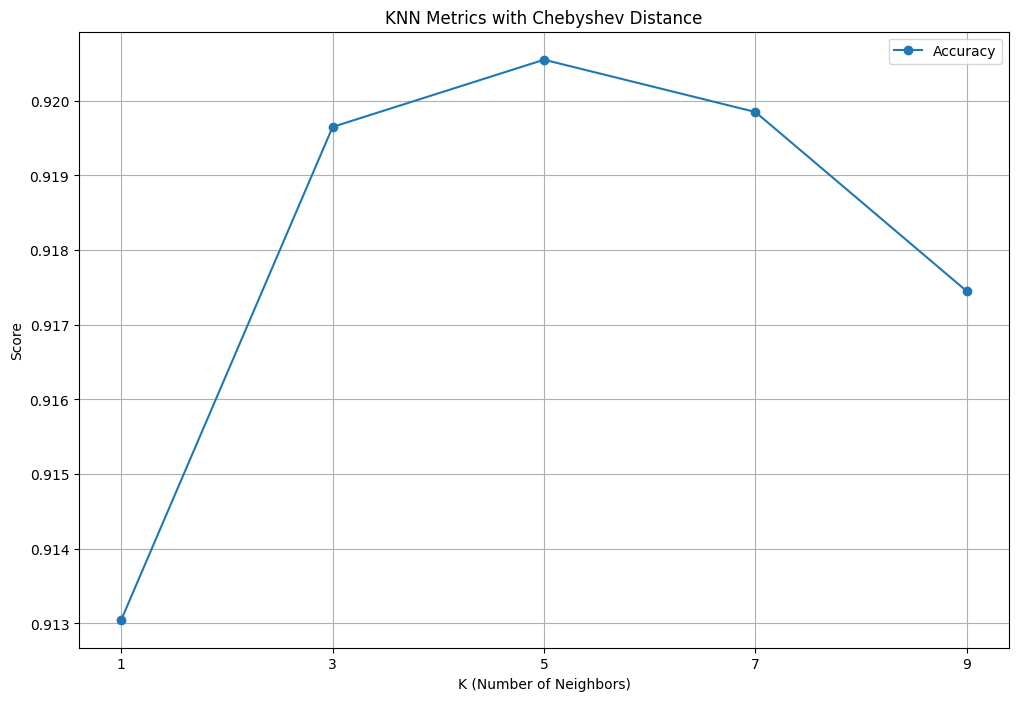


Best K for Euclidean Distance: K=3 with Accuracy=0.96

Best K for Manhattan Distance: K=5 with Accuracy=0.96

Best K for Chebyshev Distance: K=5 with Accuracy=0.92


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold, cross_val_predict
import matplotlib.pyplot as plt
import numpy as np

# Normalize features to range [0, 1]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Define a wider range of K values
k_values = range(1, 11,2)  # Explore a wider range of K
distance_metrics = ['euclidean', 'manhattan', 'chebyshev']

results = {metric: {'accuracy': [], 'precision': [], 'recall': [], 'f1_score': []} for metric in distance_metrics}

# Cross-validation setup
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)  # 5-fold cross-validation

print("\nEvaluating KNN with Cross-Validation for Different Distance Metrics:\n")

# Evaluate for each distance metric
for metric in distance_metrics:
    print(f"\nEvaluating KNN with {metric.capitalize()} distance metric:\n")
    for k in k_values:
        # Initialize the KNN classifier with the current metric and weights='distance'
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric, weights='distance')

        # Perform cross-validation and get predictions
        y_pred = cross_val_predict(knn, X, y, cv=cv)

        # Calculate evaluation metrics
        accuracy = accuracy_score(y, y_pred)
        precision = precision_score(y, y_pred, average='weighted')
        recall = recall_score(y, y_pred, average='weighted')
        f1 = f1_score(y, y_pred, average='weighted')

        # Store the results for the current metric and k
        results[metric]['accuracy'].append(accuracy)
        results[metric]['precision'].append(precision)
        results[metric]['recall'].append(recall)
        results[metric]['f1_score'].append(f1)

        # Print the results for the current k
        print(f"K={k}: Accuracy={accuracy:.2f}, Precision={precision:.2f}, Recall={recall:.2f}, F1 Score={f1:.2f}")

# Visualize the results for each metric
for metric in distance_metrics:
    plt.figure(figsize=(12, 8))
    plt.plot(k_values, results[metric]['accuracy'], marker='o', label='Accuracy')

    plt.title(f"KNN Metrics with {metric.capitalize()} Distance")
    plt.xlabel("K (Number of Neighbors)")
    plt.ylabel("Score")
    plt.xticks(k_values)
    plt.legend()
    plt.grid(True)
    plt.show()

# Find the best results
best_results = {}
for metric in distance_metrics:
    best_k = k_values[np.argmax(results[metric]['accuracy'])]
    best_accuracy = max(results[metric]['accuracy'])
    best_results[metric] = {'best_k': best_k, 'best_accuracy': best_accuracy}
    print(f"\nBest K for {metric.capitalize()} Distance: K={best_k} with Accuracy={best_accuracy:.2f}")


# **#   Here The Above is the best result of all the K Values in Euclidean Distances**

# **After This There Are the Reuslts, Accuracy and Confusion Matrix for Seperate Each One**


Evaluating KNN with Cross-Validation for Different Distance Metrics (Accuracy Only):


Evaluating KNN with Euclidean distance metric:

K=1: CV Accuracy=0.96
K=2: CV Accuracy=0.95
K=3: CV Accuracy=0.96
K=4: CV Accuracy=0.95
K=5: CV Accuracy=0.95
K=6: CV Accuracy=0.95
K=7: CV Accuracy=0.95
K=8: CV Accuracy=0.95
K=9: CV Accuracy=0.95
K=10: CV Accuracy=0.95

Best K for Euclidean Distance: K=1 with CV Accuracy=0.96


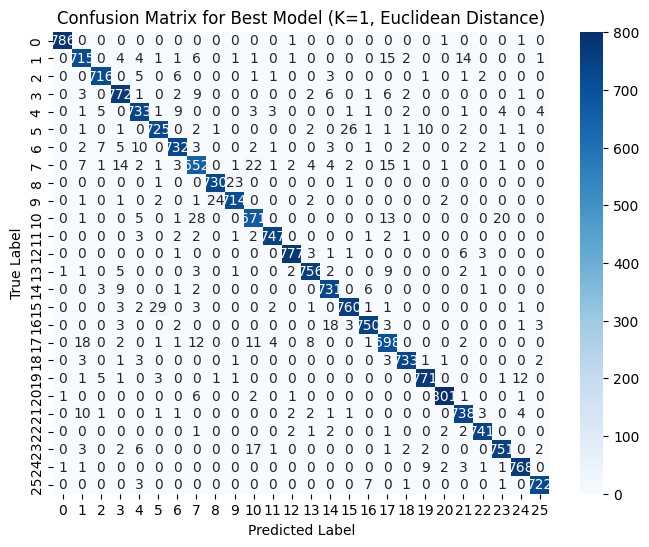


Evaluating KNN with Manhattan distance metric:

K=1: CV Accuracy=0.95
K=2: CV Accuracy=0.94
K=3: CV Accuracy=0.95
K=4: CV Accuracy=0.95
K=5: CV Accuracy=0.95
K=6: CV Accuracy=0.95
K=7: CV Accuracy=0.95
K=8: CV Accuracy=0.95
K=9: CV Accuracy=0.95
K=10: CV Accuracy=0.95

Best K for Manhattan Distance: K=1 with CV Accuracy=0.95


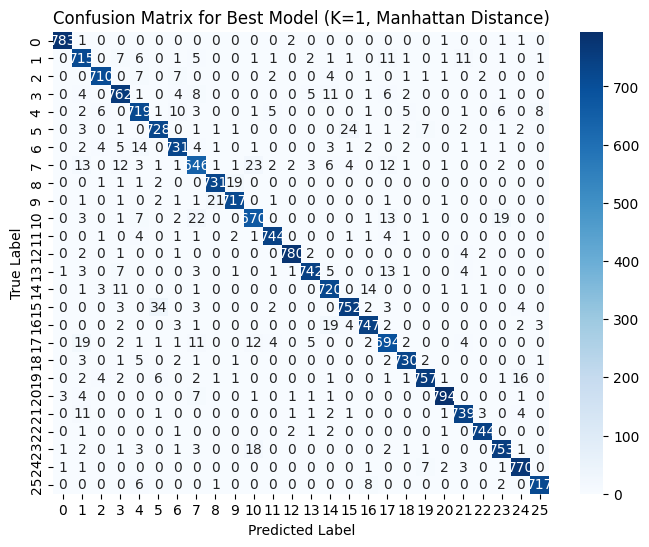


Evaluating KNN with Chebyshev distance metric:

K=1: CV Accuracy=0.91
K=2: CV Accuracy=0.89
K=3: CV Accuracy=0.91
K=4: CV Accuracy=0.91
K=5: CV Accuracy=0.91
K=6: CV Accuracy=0.91
K=7: CV Accuracy=0.91
K=8: CV Accuracy=0.90
K=9: CV Accuracy=0.90
K=10: CV Accuracy=0.90

Best K for Chebyshev Distance: K=1 with CV Accuracy=0.91


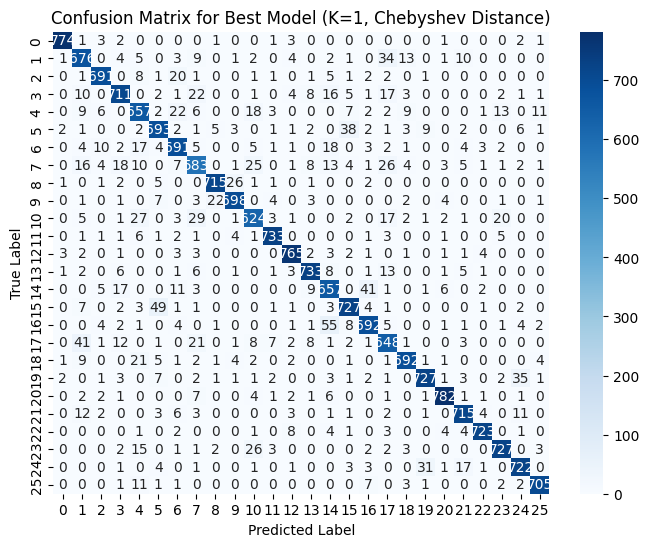

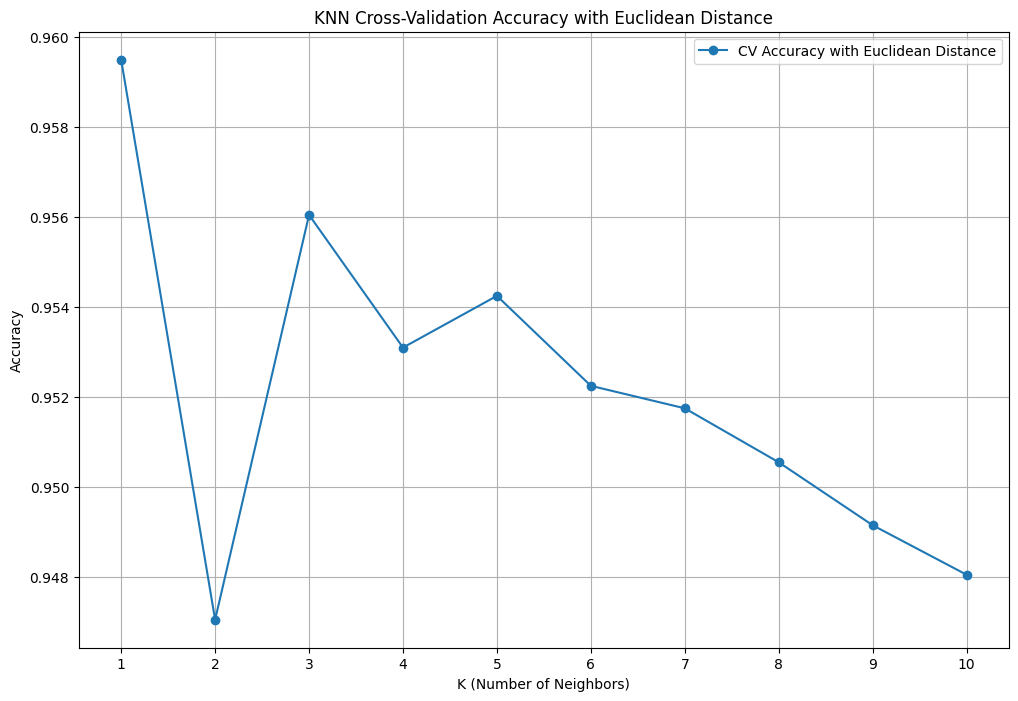

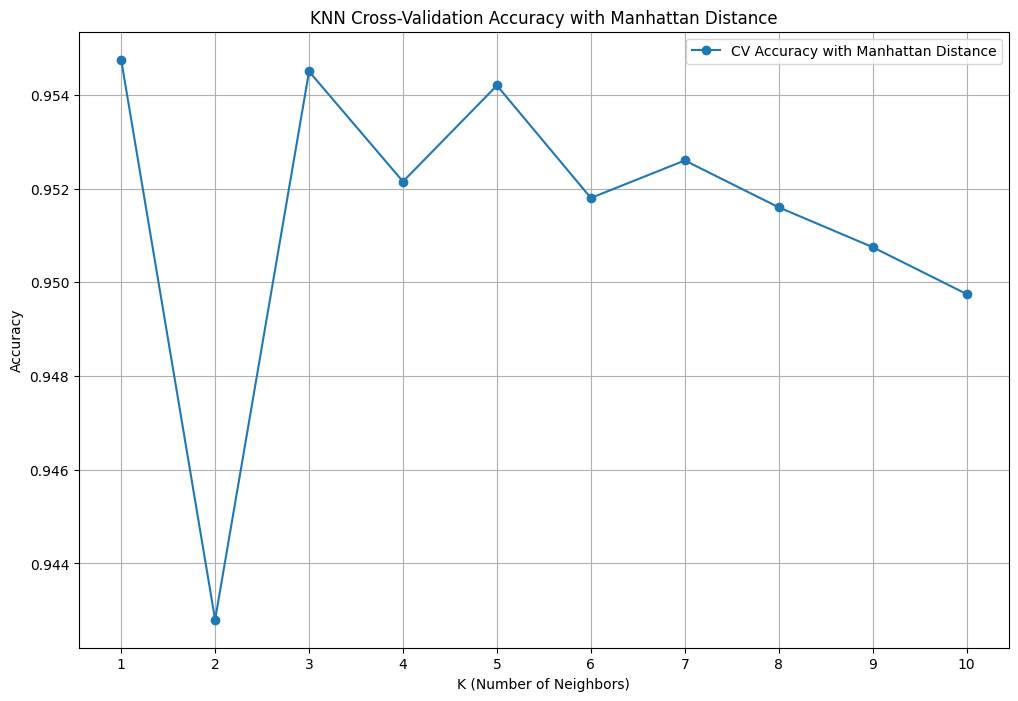

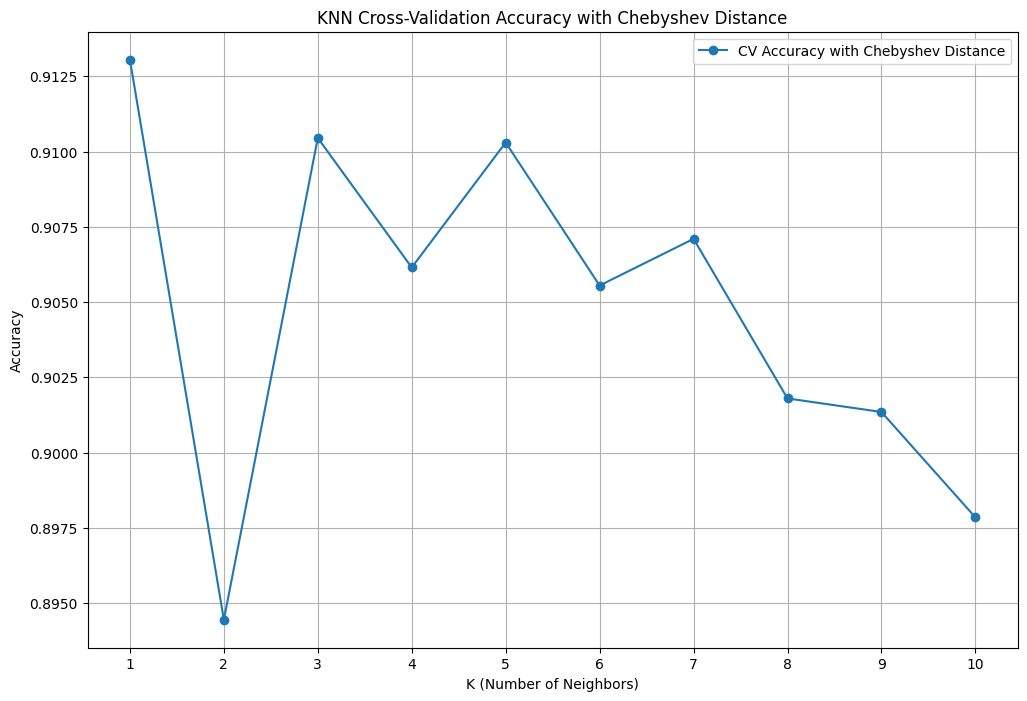

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_predict, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Normalize features to range [0, 1]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Define K values and distance metrics to evaluate
k_values = range(1, 11)
distance_metrics = ['euclidean', 'manhattan', 'chebyshev']
accuracy_results = {metric: [] for metric in distance_metrics}

# Cross-validation setup
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)  # 10-fold cross-validation

print("\nEvaluating KNN with Cross-Validation for Different Distance Metrics (Accuracy Only):\n")

# Evaluate for each distance metric
for metric in distance_metrics:
    print(f"\nEvaluating KNN with {metric.capitalize()} distance metric:\n")

    # Lists to store results for cross-validation accuracy
    cv_accuracies = []

    for k in k_values:
        # Initialize the KNN classifier with the current metric
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)

        # Perform cross-validation and get predictions
        y_pred_cv = cross_val_predict(knn, X, y, cv=cv)

        # Calculate cross-validation accuracy
        cv_accuracy = accuracy_score(y, y_pred_cv)
        cv_accuracies.append(cv_accuracy)

        # Store the cross-validation accuracy result for the current metric and k
        accuracy_results[metric].append(cv_accuracy)

        # Print the result for the current k (cross-validation accuracy)
        print(f"K={k}: CV Accuracy={cv_accuracy:.2f}")

    # Find the best k based on cross-validation accuracy
    best_k = k_values[np.argmax(cv_accuracies)]  # Best k based on cross-validation accuracy
    print(f"\nBest K for {metric.capitalize()} Distance: K={best_k} with CV Accuracy={max(cv_accuracies):.2f}")

    # Confusion Matrix for the best model
    best_knn = KNeighborsClassifier(n_neighbors=best_k, metric=metric)
    y_pred_best = cross_val_predict(best_knn, X, y, cv=cv)

    # Confusion matrix for the best K and metric
    conf_matrix = confusion_matrix(y, y_pred_best)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f"Confusion Matrix for Best Model (K={best_k}, {metric.capitalize()} Distance)")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Visualize the accuracy results for each metric (cross-validation accuracy)
for metric in distance_metrics:
    plt.figure(figsize=(12, 8))
    plt.plot(k_values, accuracy_results[metric], marker='o', label=f'CV Accuracy with {metric.capitalize()} Distance')
    plt.title(f"KNN Cross-Validation Accuracy with {metric.capitalize()} Distance")
    plt.xlabel("K (Number of Neighbors)")
    plt.ylabel("Accuracy")
    plt.xticks(k_values)
    plt.legend()
    plt.grid(True)
    plt.show()


# **Here This is the Main Code For Our Calculating Distances**

# **Using KNN Model For Euclidean Distance range 1 to 10**

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Evaluating KNN with Cross-Validation For Euclidean Distance:

K=1: Cross-Validation Accuracy=0.9597
K=2: Cross-Validation Accuracy=0.9466
K=3: Cross-Validation Accuracy=0.9551
K=4: Cross-Validation Accuracy=0.9531
K=5: Cross-Validation Accuracy=0.9543
K=6: Cross-Validation Accuracy=0.9518
K=7: Cross-Validation Accuracy=0.9519
K=8: Cross-Validation Accuracy=0.9509
K=9: Cross-Validation Accuracy=0.9487
K=10: Cross-Validation Accuracy=0.9476

Best K Value: K=1 with Cross-Validation Accuracy=0.9597

Confusion Matrix for Euclidean Distance K=1:



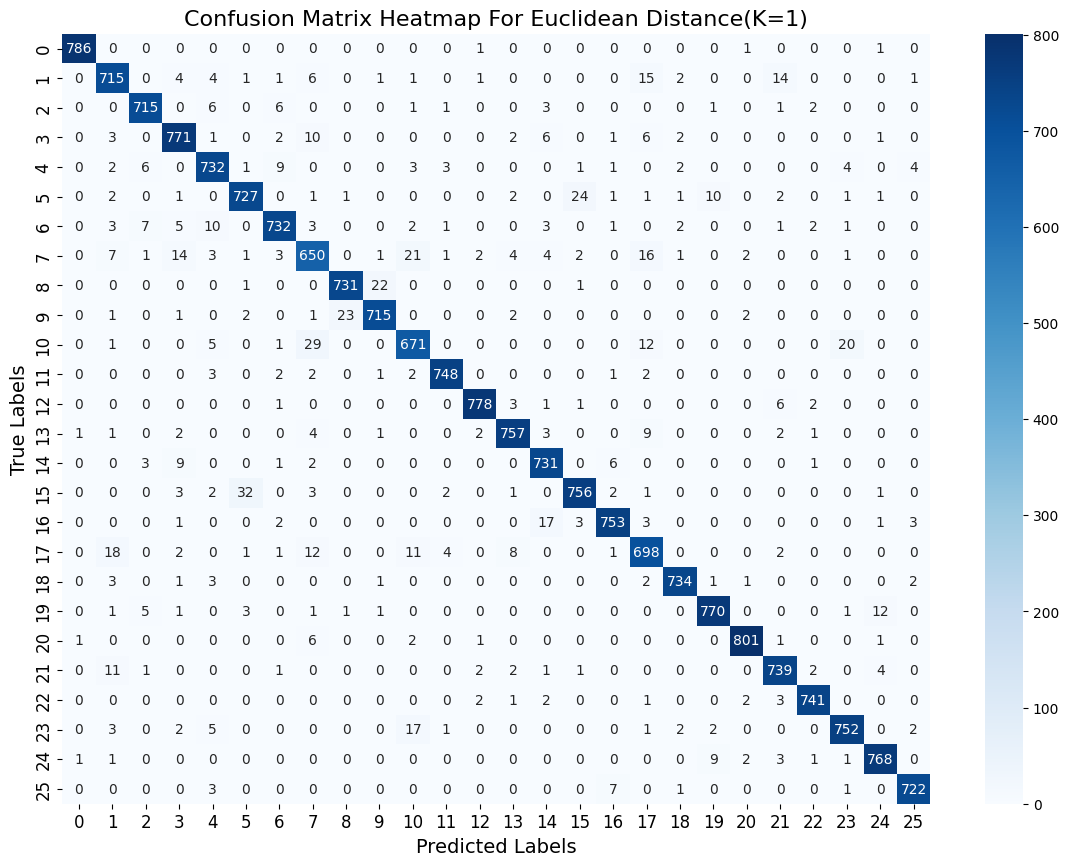


Classification Report for Euclidean Distance:

              precision    recall  f1-score   support

           A       1.00      1.00      1.00       789
           B       0.93      0.93      0.93       766
           C       0.97      0.97      0.97       736
           D       0.94      0.96      0.95       805
           E       0.94      0.95      0.95       768
           F       0.95      0.94      0.94       775
           G       0.96      0.95      0.95       773
           H       0.89      0.89      0.89       734
           I       0.97      0.97      0.97       755
           J       0.96      0.96      0.96       747
           K       0.92      0.91      0.91       739
           L       0.98      0.98      0.98       761
           M       0.99      0.98      0.98       792
           N       0.97      0.97      0.97       783
           O       0.95      0.97      0.96       753
           P       0.96      0.94      0.95       803
           Q       0.97      0.96

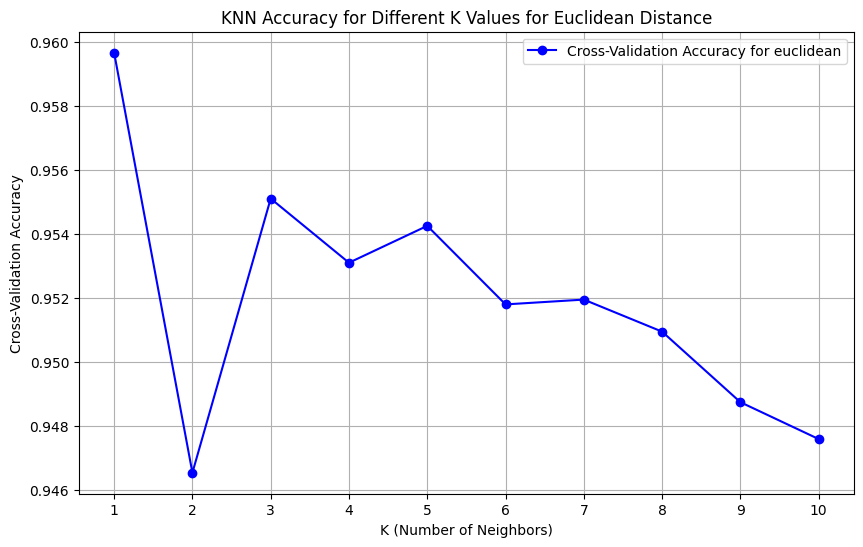

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    precision_score, recall_score, f1_score, ConfusionMatrixDisplay
)
from sklearn.model_selection import StratifiedKFold, cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns  # For heatmap visualization

from ucimlrepo import fetch_ucirepo

# Fetch dataset
letter_recognition = fetch_ucirepo(id=59)

# Data (as pandas dataframes)
X = letter_recognition.data.features
y = letter_recognition.data.targets

# Encode labels (letters) into integers (if necessary)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Convert A-Z into integers 0-25

# Normalize features to range [0, 1]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Define K values to evaluate
k_values = range(1, 11)  # Test for K = 1 to 10
results = {'k': [], 'accuracy': []}

# Cross-validation setup
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)  # 10-fold cross-validation

# Evaluate KNN for each value of K
print("\nEvaluating KNN with Cross-Validation For Euclidean Distance:\n")
for k in k_values:
    # Initialize the KNN classifier with Chebyshev distance
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')

    # Perform cross-validation and get predictions
    y_pred = cross_val_predict(knn, X, y, cv=cv)

    # Calculate accuracy
    accuracy = accuracy_score(y, y_pred)
    results['k'].append(k)
    results['accuracy'].append(accuracy)

    print(f"K={k}: Cross-Validation Accuracy={accuracy:.4f}")

# Find the best K value based on accuracy
best_k = results['k'][np.argmax(results['accuracy'])]
best_accuracy = max(results['accuracy'])
print(f"\nBest K Value: K={best_k} with Cross-Validation Accuracy={best_accuracy:.4f}")

# Confusion Matrix for the Best K
print(f"\nConfusion Matrix for Euclidean Distance K={best_k}:\n")
knn_best = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
y_pred_best = cross_val_predict(knn_best, X, y, cv=cv)
conf_matrix = confusion_matrix(y, y_pred_best)

# Enhanced Confusion Matrix with Seaborn Heatmap
plt.figure(figsize=(14, 10))  # Adjust figure size for clarity
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title(f"Confusion Matrix Heatmap For Euclidean Distance(K={best_k})", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Classification Report
class_report = classification_report(y, y_pred_best, target_names=label_encoder.classes_)
print("\nClassification Report for Euclidean Distance:\n")
print(class_report)

# Calculate and Display Precision, Recall, F1 Score, and Accuracy
precision = precision_score(y, y_pred_best, average=None)
recall = recall_score(y, y_pred_best, average=None)
f1 = f1_score(y, y_pred_best, average=None)
accuracy = accuracy_score(y, y_pred_best)

# Display in a tabular format
metrics_df = pd.DataFrame({
    'Class': label_encoder.classes_,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
})

print("\nPer-Class Metrics:\n")
print(metrics_df)

# Overall Metrics
print("\nOverall Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Macro Precision: {precision_score(y, y_pred_best, average='macro'):.4f}")
print(f"Macro Recall: {recall_score(y, y_pred_best, average='macro'):.4f}")
print(f"Macro F1-Score: {f1_score(y, y_pred_best, average='macro'):.4f}")

# Plot Accuracy vs. K Values
plt.figure(figsize=(10, 6))
plt.plot(results['k'], results['accuracy'], marker='o', linestyle='-', color='b', label='Cross-Validation Accuracy for euclidean')
plt.title("KNN Accuracy for Different K Values for Euclidean Distance")
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Cross-Validation Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()


# **Using KNN Model For Manhattan Distance range 1 to 10**

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Evaluating KNN with Cross-Validation For Manhattan Distance:

K=1: Cross-Validation Accuracy=0.9547
K=2: Cross-Validation Accuracy=0.9428
K=3: Cross-Validation Accuracy=0.9545
K=4: Cross-Validation Accuracy=0.9522
K=5: Cross-Validation Accuracy=0.9542
K=6: Cross-Validation Accuracy=0.9518
K=7: Cross-Validation Accuracy=0.9526
K=8: Cross-Validation Accuracy=0.9516
K=9: Cross-Validation Accuracy=0.9507
K=10: Cross-Validation Accuracy=0.9497

Best K Value: K=1 with Cross-Validation Accuracy=0.9547

Confusion Matrix for Manhattan Distance K=1:



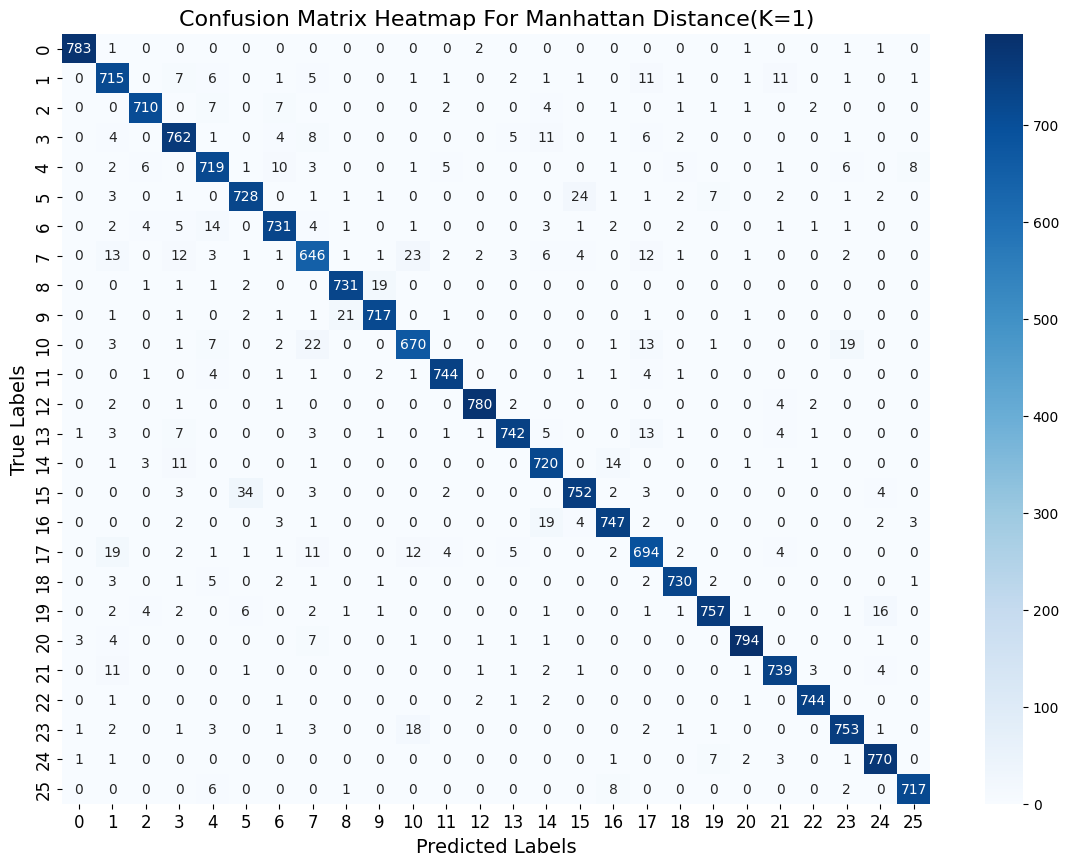


Classification Report for Manhattan Distance:

              precision    recall  f1-score   support

           A       0.99      0.99      0.99       789
           B       0.90      0.93      0.92       766
           C       0.97      0.96      0.97       736
           D       0.93      0.95      0.94       805
           E       0.93      0.94      0.93       768
           F       0.94      0.94      0.94       775
           G       0.95      0.95      0.95       773
           H       0.89      0.88      0.89       734
           I       0.97      0.97      0.97       755
           J       0.97      0.96      0.96       747
           K       0.92      0.91      0.91       739
           L       0.98      0.98      0.98       761
           M       0.99      0.98      0.99       792
           N       0.97      0.95      0.96       783
           O       0.93      0.96      0.94       753
           P       0.95      0.94      0.95       803
           Q       0.96      0.95

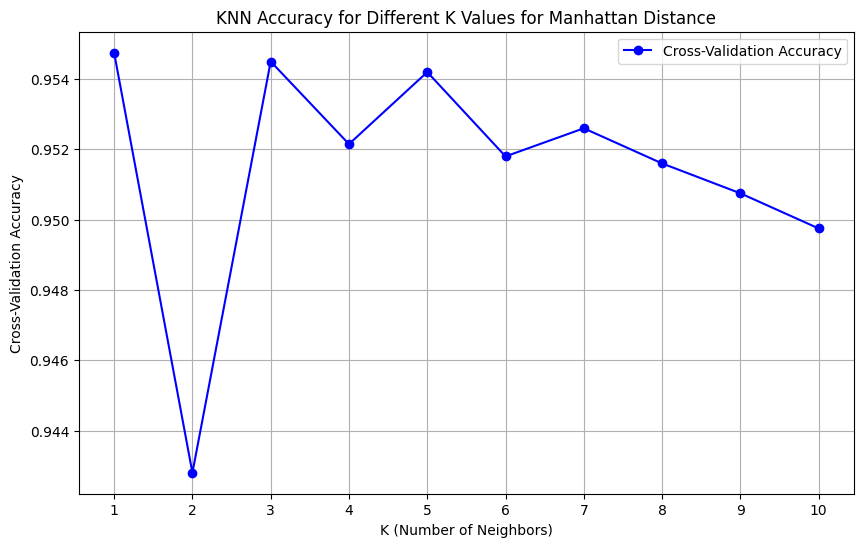

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    precision_score, recall_score, f1_score, ConfusionMatrixDisplay
)
from sklearn.model_selection import StratifiedKFold, cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns  # For heatmap visualization

from ucimlrepo import fetch_ucirepo

# Fetch dataset
letter_recognition = fetch_ucirepo(id=59)

# Data (as pandas dataframes)
X = letter_recognition.data.features
y = letter_recognition.data.targets

# Encode labels (letters) into integers (if necessary)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Convert A-Z into integers 0-25

# Normalize features to range [0, 1]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Define K values to evaluate
k_values = range(1, 11)  # Test for K = 1 to 10
results = {'k': [], 'accuracy': []}

# Cross-validation setup
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)  # 10-fold cross-validation

# Evaluate KNN for each value of K
print("\nEvaluating KNN with Cross-Validation For Manhattan Distance:\n")
for k in k_values:
    # Initialize the KNN classifier with Chebyshev distance
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')

    # Perform cross-validation and get predictions
    y_pred = cross_val_predict(knn, X, y, cv=cv)

    # Calculate accuracy
    accuracy = accuracy_score(y, y_pred)
    results['k'].append(k)
    results['accuracy'].append(accuracy)

    print(f"K={k}: Cross-Validation Accuracy={accuracy:.4f}")

# Find the best K value based on accuracy
best_k = results['k'][np.argmax(results['accuracy'])]
best_accuracy = max(results['accuracy'])
print(f"\nBest K Value: K={best_k} with Cross-Validation Accuracy={best_accuracy:.4f}")

# Confusion Matrix for the Best K
print(f"\nConfusion Matrix for Manhattan Distance K={best_k}:\n")
knn_best = KNeighborsClassifier(n_neighbors=best_k, metric='manhattan')
y_pred_best = cross_val_predict(knn_best, X, y, cv=cv)
conf_matrix = confusion_matrix(y, y_pred_best)

# Enhanced Confusion Matrix with Seaborn Heatmap
plt.figure(figsize=(14, 10))  # Adjust figure size for clarity
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title(f"Confusion Matrix Heatmap For Manhattan Distance(K={best_k})", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Classification Report
class_report = classification_report(y, y_pred_best, target_names=label_encoder.classes_)
print("\nClassification Report for Manhattan Distance:\n")
print(class_report)

# Calculate and Display Precision, Recall, F1 Score, and Accuracy
precision = precision_score(y, y_pred_best, average=None)
recall = recall_score(y, y_pred_best, average=None)
f1 = f1_score(y, y_pred_best, average=None)
accuracy = accuracy_score(y, y_pred_best)

# Display in a tabular format
metrics_df = pd.DataFrame({
    'Class': label_encoder.classes_,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
})

print("\nPer-Class Metrics:\n")
print(metrics_df)

# Overall Metrics
print("\nOverall Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Macro Precision: {precision_score(y, y_pred_best, average='macro'):.4f}")
print(f"Macro Recall: {recall_score(y, y_pred_best, average='macro'):.4f}")
print(f"Macro F1-Score: {f1_score(y, y_pred_best, average='macro'):.4f}")

# Plot Accuracy vs. K Values
plt.figure(figsize=(10, 6))
plt.plot(results['k'], results['accuracy'], marker='o', linestyle='-', color='b', label='Cross-Validation Accuracy')
plt.title("KNN Accuracy for Different K Values for Manhattan Distance")
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Cross-Validation Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()


# **Using KNN Model For Chebyshev Distance range 1 to 10**

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Evaluating KNN with Cross-Validation for chebyshev Distance Accuracy:

K=1: Cross-Validation Accuracy=0.9131
K=2: Cross-Validation Accuracy=0.8944
K=3: Cross-Validation Accuracy=0.9104
K=4: Cross-Validation Accuracy=0.9062
K=5: Cross-Validation Accuracy=0.9103
K=6: Cross-Validation Accuracy=0.9055
K=7: Cross-Validation Accuracy=0.9071
K=8: Cross-Validation Accuracy=0.9018
K=9: Cross-Validation Accuracy=0.9013
K=10: Cross-Validation Accuracy=0.8979

Best K Value: K=1 with Cross-Validation Accuracy=0.9131

Confusion Matrix for chebyshev Distance Accuracy K=1:



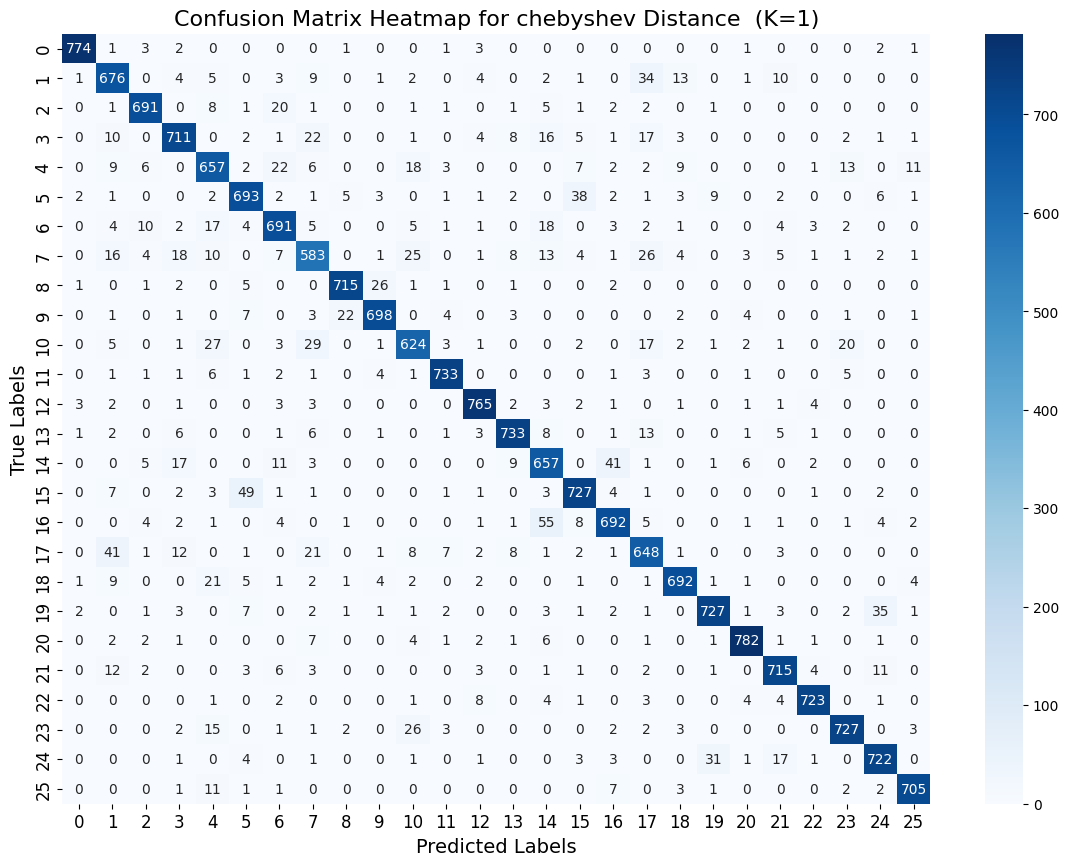


Classification Report for chebyshev Distance Accuracy:

              precision    recall  f1-score   support

           A       0.99      0.98      0.98       789
           B       0.84      0.88      0.86       766
           C       0.95      0.94      0.94       736
           D       0.90      0.88      0.89       805
           E       0.84      0.86      0.85       768
           F       0.88      0.89      0.89       775
           G       0.88      0.89      0.89       773
           H       0.82      0.79      0.81       734
           I       0.96      0.95      0.95       755
           J       0.94      0.93      0.94       747
           K       0.87      0.84      0.85       739
           L       0.96      0.96      0.96       761
           M       0.95      0.97      0.96       792
           N       0.94      0.94      0.94       783
           O       0.83      0.87      0.85       753
           P       0.90      0.91      0.90       803
           Q       0.90 

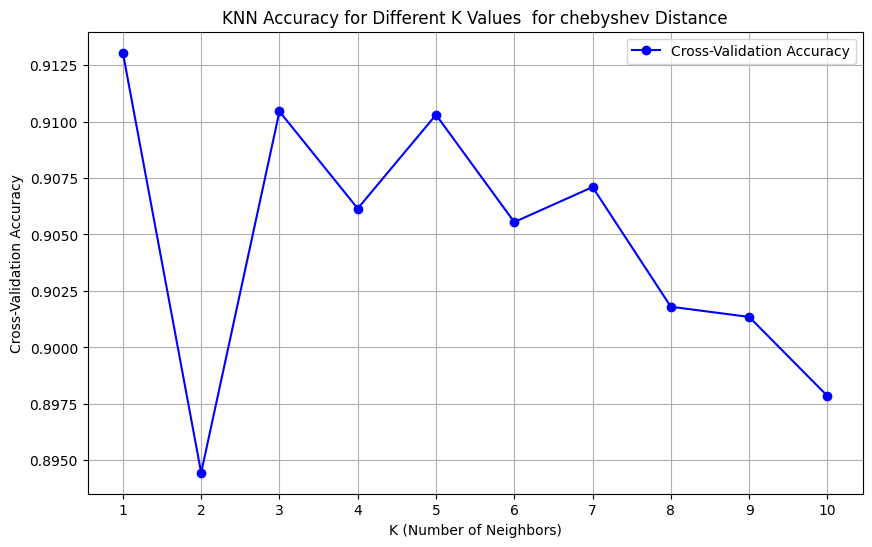

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    precision_score, recall_score, f1_score, ConfusionMatrixDisplay
)
from sklearn.model_selection import StratifiedKFold, cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns  # For heatmap visualization

from ucimlrepo import fetch_ucirepo

# Fetch dataset
letter_recognition = fetch_ucirepo(id=59)

# Data (as pandas dataframes)
X = letter_recognition.data.features
y = letter_recognition.data.targets

# Encode labels (letters) into integers (if necessary)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Convert A-Z into integers 0-25

# Normalize features to range [0, 1]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Define K values to evaluate
k_values = range(1, 11)  # Test for K = 1 to 10
results = {'k': [], 'accuracy': []}

# Cross-validation setup
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)  # 10-fold cross-validation

# Evaluate KNN for each value of K
print("\nEvaluating KNN with Cross-Validation for chebyshev Distance Accuracy:\n")
for k in k_values:
    # Initialize the KNN classifier with Chebyshev distance
    knn = KNeighborsClassifier(n_neighbors=k, metric='chebyshev')

    # Perform cross-validation and get predictions
    y_pred = cross_val_predict(knn, X, y, cv=cv)

    # Calculate accuracy
    accuracy = accuracy_score(y, y_pred)
    results['k'].append(k)
    results['accuracy'].append(accuracy)

    print(f"K={k}: Cross-Validation Accuracy={accuracy:.4f}")

# Find the best K value based on accuracy
best_k = results['k'][np.argmax(results['accuracy'])]
best_accuracy = max(results['accuracy'])
print(f"\nBest K Value: K={best_k} with Cross-Validation Accuracy={best_accuracy:.4f}")

# Confusion Matrix for the Best K
print(f"\nConfusion Matrix for chebyshev Distance Accuracy K={best_k}:\n")
knn_best = KNeighborsClassifier(n_neighbors=best_k, metric='chebyshev')
y_pred_best = cross_val_predict(knn_best, X, y, cv=cv)
conf_matrix = confusion_matrix(y, y_pred_best)

# Enhanced Confusion Matrix with Seaborn Heatmap
plt.figure(figsize=(14, 10))  # Adjust figure size for clarity
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title(f"Confusion Matrix Heatmap for chebyshev Distance  (K={best_k})", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Classification Report
class_report = classification_report(y, y_pred_best, target_names=label_encoder.classes_)
print("\nClassification Report for chebyshev Distance Accuracy:\n")
print(class_report)

# Calculate and Display Precision, Recall, F1 Score, and Accuracy
precision = precision_score(y, y_pred_best, average=None)
recall = recall_score(y, y_pred_best, average=None)
f1 = f1_score(y, y_pred_best, average=None)
accuracy = accuracy_score(y, y_pred_best)

# Display in a tabular format
metrics_df = pd.DataFrame({
    'Class': label_encoder.classes_,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
})

print("\nPer-Class Metrics:\n")
print(metrics_df)

# Overall Metrics
print("\nOverall Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Macro Precision: {precision_score(y, y_pred_best, average='macro'):.4f}")
print(f"Macro Recall: {recall_score(y, y_pred_best, average='macro'):.4f}")
print(f"Macro F1-Score: {f1_score(y, y_pred_best, average='macro'):.4f}")

# Plot Accuracy vs. K Values
plt.figure(figsize=(10, 6))
plt.plot(results['k'], results['accuracy'], marker='o', linestyle='-', color='b', label='Cross-Validation Accuracy')
plt.title("KNN Accuracy for Different K Values  for chebyshev Distance")
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Cross-Validation Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()
